# Decision Trees

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

<img src="./images/decision_tree.png"/>

<img src="./images/dt_01.png"/>

<img src="./images/dt_03.png"/>

## Building decision trees

<img src="./images/two_moons.png"/>

<img src="./images/depth_1.png"/>

<img src="./images/depth_2.png">

<img src="./images/depth_9.png">

---

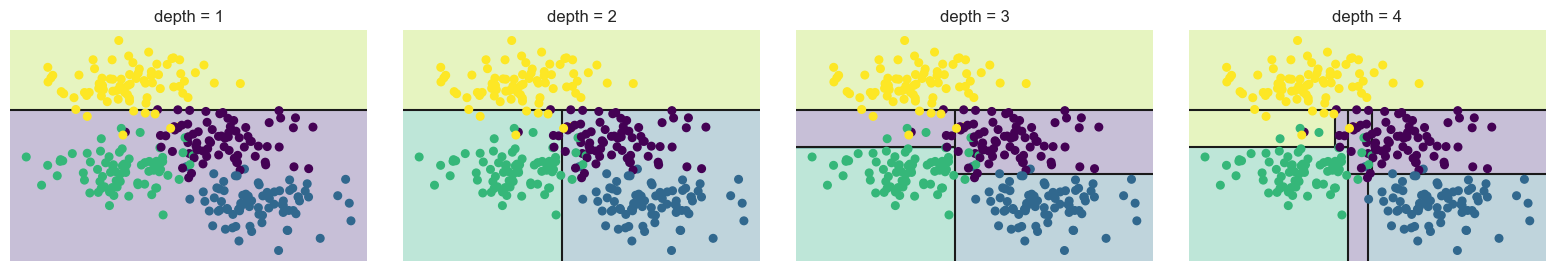

In [2]:
from helpers import helpers_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

        
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    helpers_tree.visualize_tree(model, X, y, ax=axi)
    axi.set_title(f'depth = {depth}')

plt.show()

## Measuring purity

<img src="./images/dt_06.png"/>

<img src="./images/dt_07.png"/>

<img src="./images/dt_08.png"/>

## Build a decision tree model using Scikit-learn

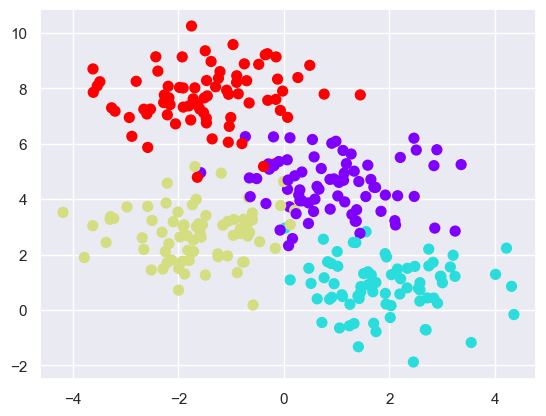

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X, y)

In [5]:
from helpers import helpers_tree

helpers_tree.plot_tree_interactive(X, y)
plt.show()

interactive(children=(Dropdown(description='depth', index=4, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=5)…

## Controlling complexity of decision trees

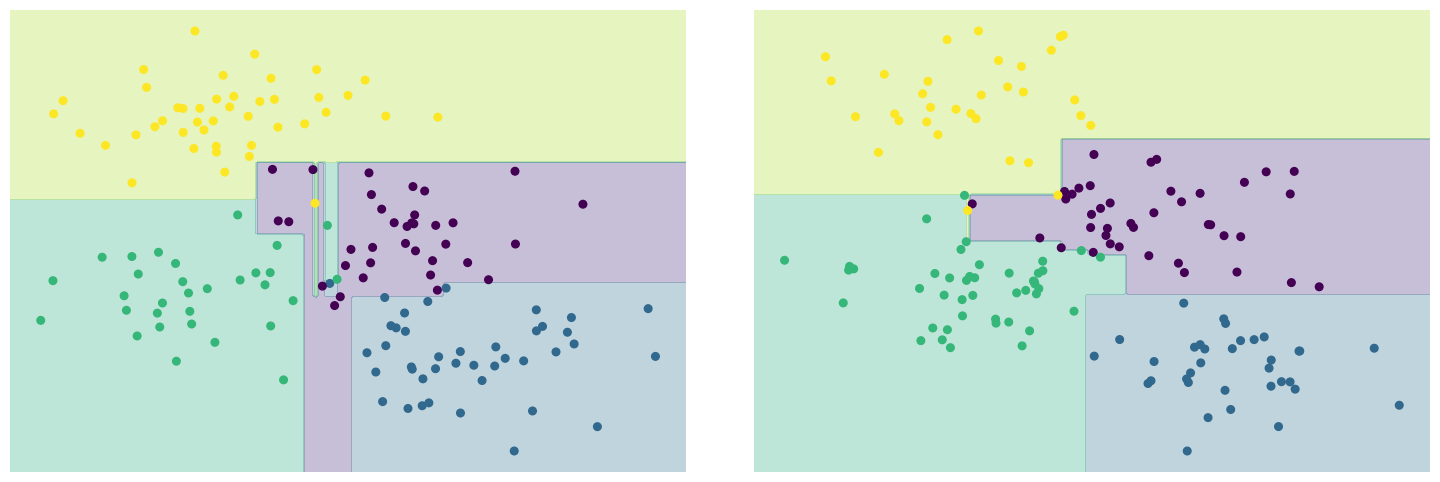

In [6]:
from helpers import helpers_tree

model = DecisionTreeClassifier()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
helpers_tree.visualize_tree(model, X[::2], y[::2], boundaries=False, ax=ax[0])
helpers_tree.visualize_tree(model, X[1::2], y[1::2], boundaries=False, ax=ax[1])
plt.show()

- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(X_test, y_test):.3f}")

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [8]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(X_test, y_test):.3f}")

Accuracy on training set: 0.988
Accuracy on test set: 0.951


---

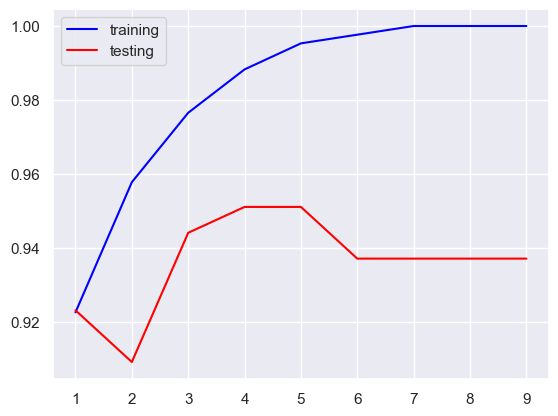

In [9]:
traning_scores = {}
testing_scores = {}

depths = list(range(1,10))

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(X_train, y_train)
    traning_scores[depth] = tree.score(X_train, y_train)
    testing_scores[depth] = tree.score(X_test, y_test)
    
plt.plot(traning_scores.keys(), traning_scores.values(), c="blue", label="training")
plt.plot(testing_scores.keys(), testing_scores.values(), c="red", label="testing")
plt.legend()
plt.show()

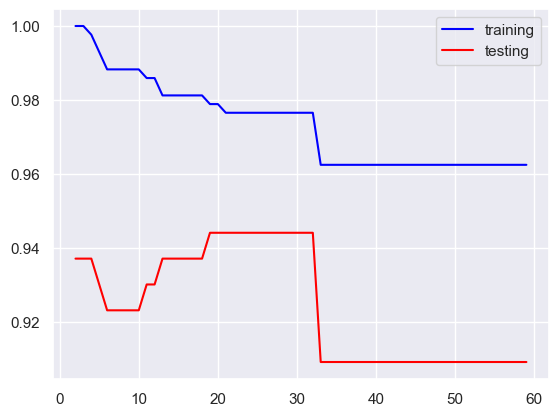

In [10]:
traning_scores = {}
testing_scores = {}

min_samples_splits = list(range(2,60))

for mss in min_samples_splits:
    tree = DecisionTreeClassifier(min_samples_split=mss, random_state=0)
    tree.fit(X_train, y_train)
    traning_scores[mss] = tree.score(X_train, y_train)
    testing_scores[mss] = tree.score(X_test, y_test)
    
plt.plot(traning_scores.keys(), traning_scores.values(), c="blue", label="training")
plt.plot(testing_scores.keys(), testing_scores.values(), c="red", label="testing")
plt.legend()
plt.show()

## Analyzing decision trees

In [11]:
from sklearn.tree import export_graphviz

In [12]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

export_graphviz(tree, out_file="data/tree.dot", 
                class_names=["malignant", "benign"], 
                feature_names=cancer.feature_names, 
                impurity=False, 
                filled=True)

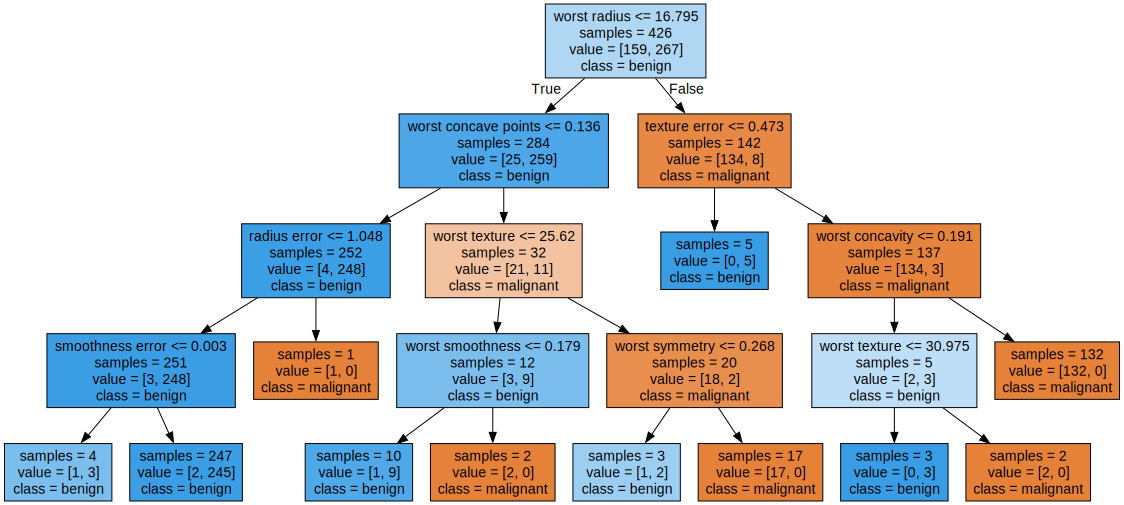

In [13]:
import graphviz

with open("data/tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

## Feature importance in trees

In [14]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

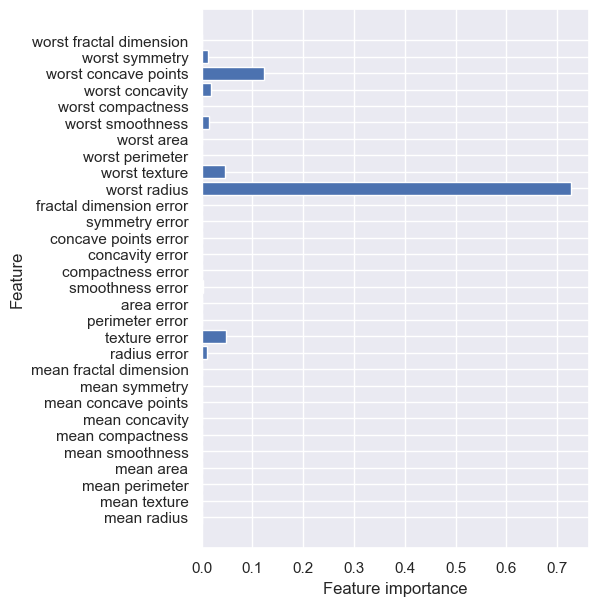

In [15]:
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(5, 7))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

plot_feature_importances_cancer(tree)

## Example: Heart dataset

In [16]:
import pandas as pd

heart_data = pd.read_csv('data/heart.csv')
# show the first 5 lines of the dataframe
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [17]:
X = heart_data.drop('HeartDisease', axis=1)
y = heart_data['HeartDisease']

In [18]:
X = pd.get_dummies(X, drop_first=True)

In [19]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,False,True,False,False,False,False,False,True,False


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)

In [23]:
acc

0.8188405797101449

In [24]:
from sklearn.tree import DecisionTreeClassifier

best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [2,3,4,5,6]:
        for min_samples_leaf in [5, 10, 20, 30]:
            dtree = DecisionTreeClassifier(max_depth=max_depth, 
                                           criterion=criterion, 
                                           min_samples_leaf=min_samples_leaf, 
                                           random_state=0)
            dtree.fit(X_train, y_train)
            predicitions = dtree.predict(X_test)
            acc = accuracy_score(y_test, predicitions)
            if acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                best_acc = acc
                
print(best_params)
print(best_acc)

criterion: gini, max_depth: 4, min_samples_leaf: 10
0.8405797101449275


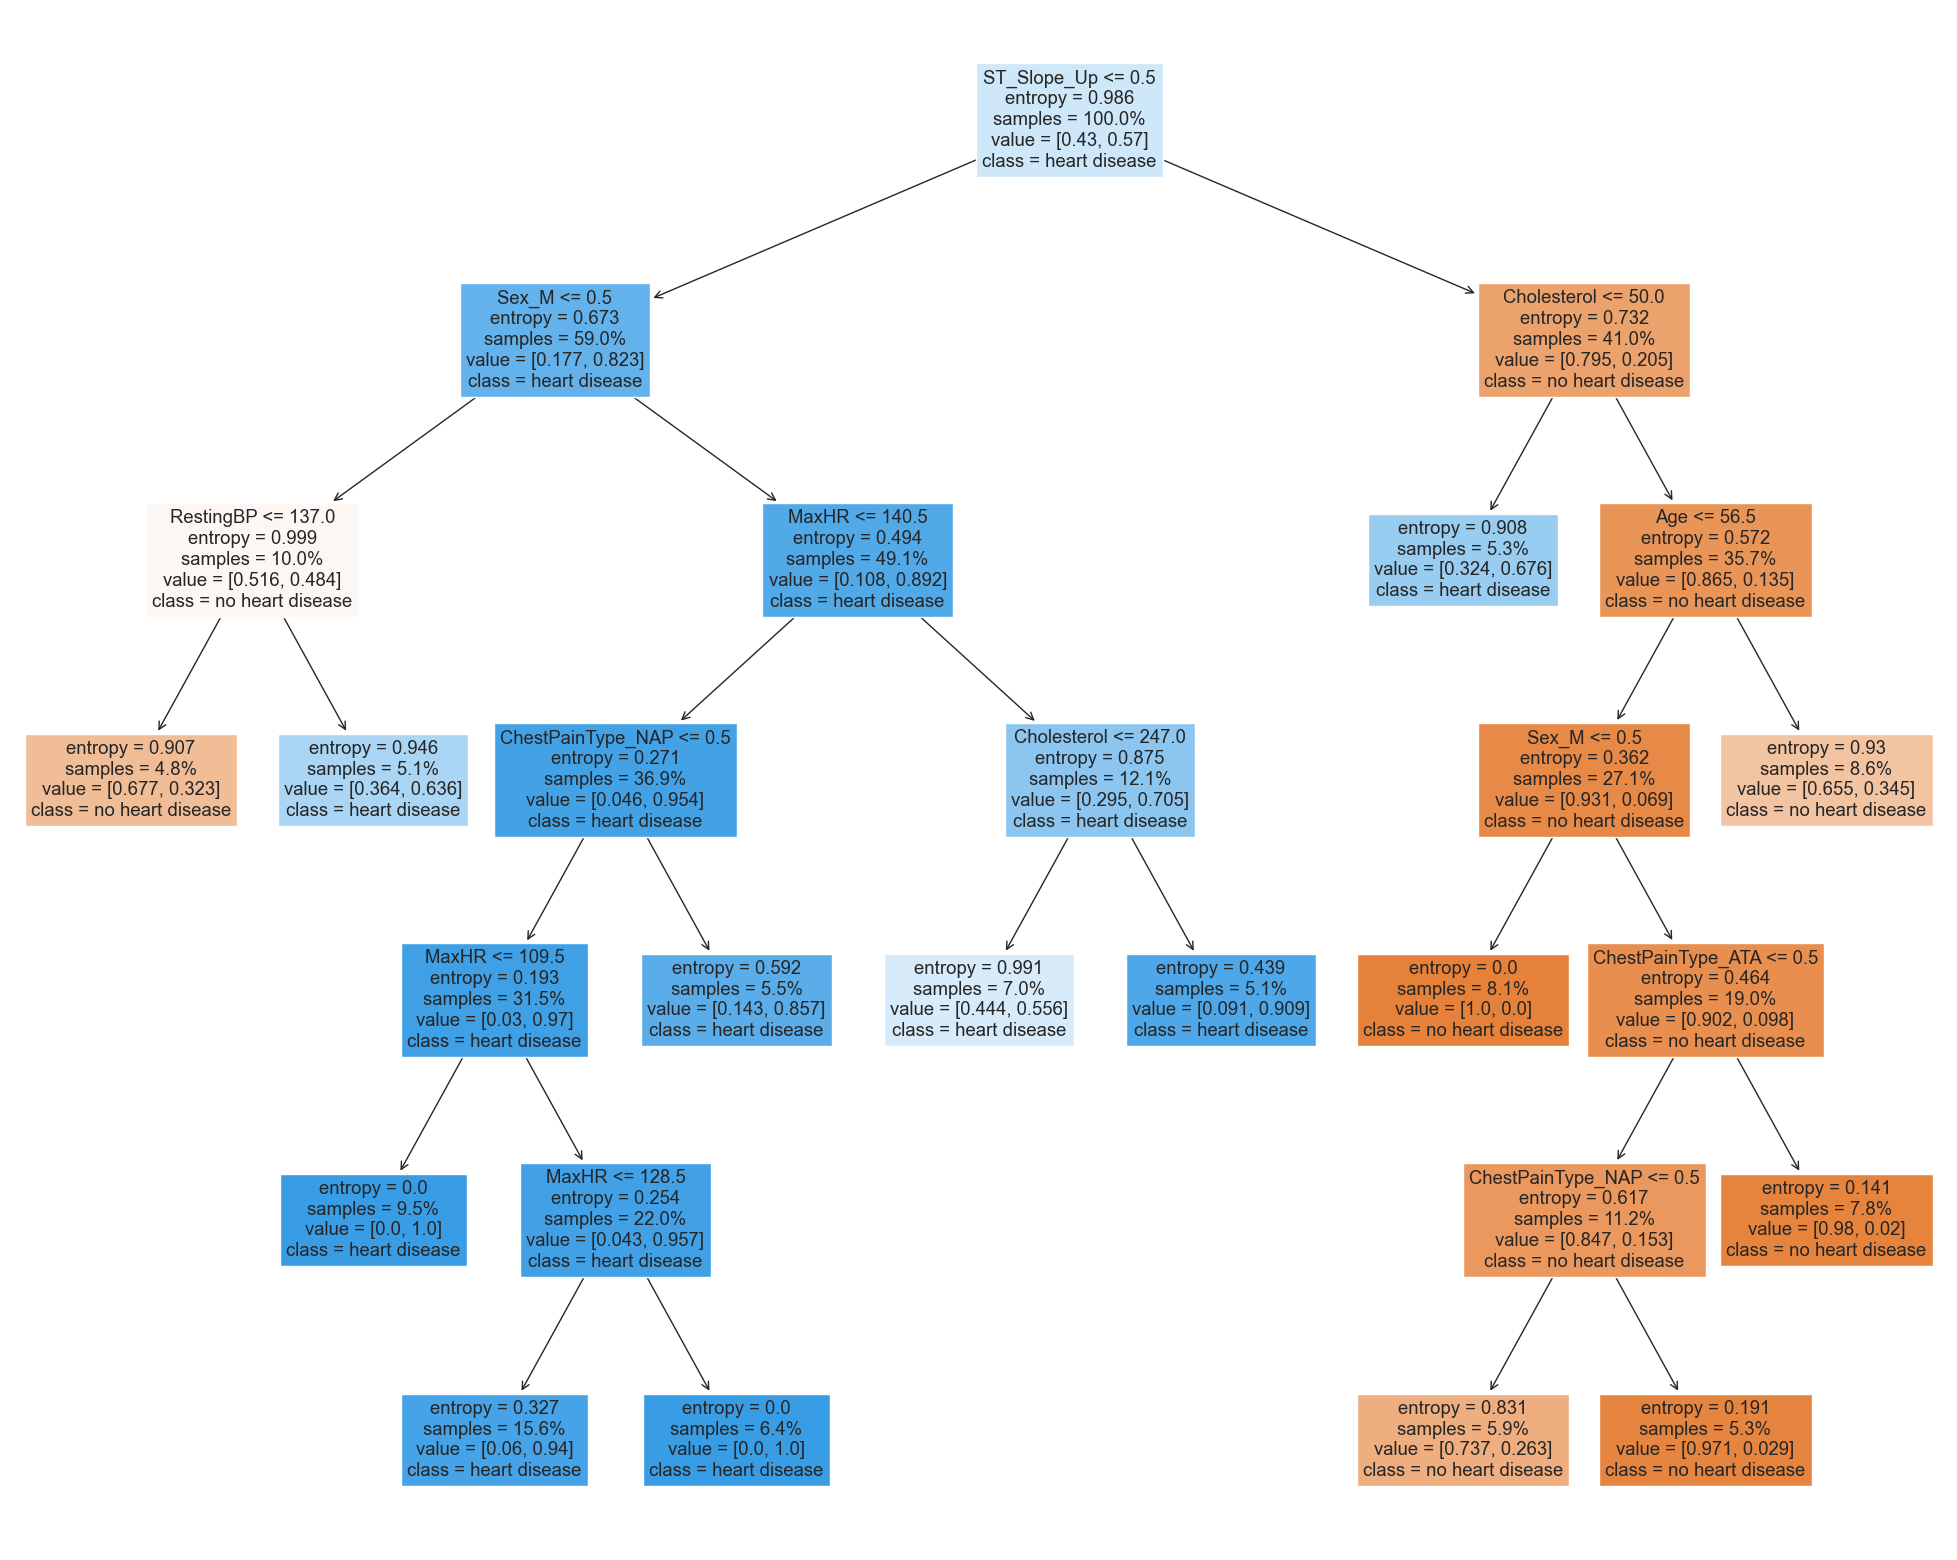

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = list(X.columns),
            class_names=['no heart disease', 'heart disease'], 
            impurity=True,
            proportion=True,
            filled=True)
plt.show()

## Decision trees for regression

In [26]:
ram_prices = pd.read_csv("data/ram_price.csv", index_col=0)

In [27]:
ram_prices.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


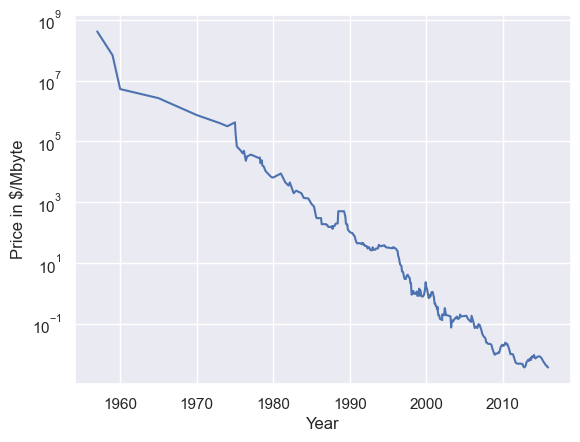

In [28]:
plt.semilogy(ram_prices["date"], ram_prices["price"])
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.show()

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices["date"] < 2000]
data_test = ram_prices[ram_prices["date"] >= 2000]

In [30]:
# predict prices based on date
X_train = data_train["date"].values.reshape(data_train.shape[0] , 1)

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train["price"])

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [31]:
# predict on all data
X_all = ram_prices["date"].values.reshape(ram_prices.shape[0], 1)

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [32]:
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

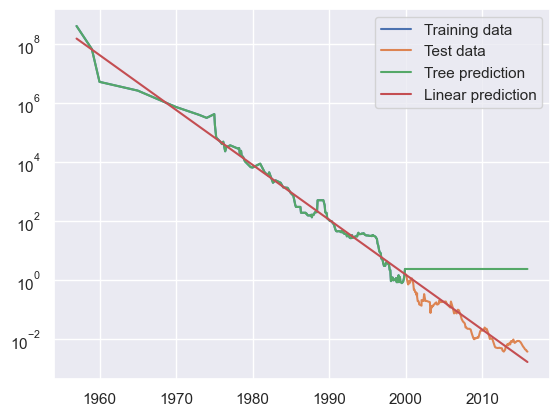

In [33]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()
plt.show()

 **The tree has no ability to generate “new” responses, outside of what was seen in the training
data**. This shortcoming **applies to all models based on trees**.

## Strengths, weaknesses, and parameters

As discussed earlier, the **parameters that control model complexity in decision trees**
are the pre-pruning parameters that stop the building of the tree before it is fully
developed. Usually, picking one of the pre-pruning strategies—setting either
`max_depth`, `max_leaf_nodes`, or `min_samples_leaf` is sufficient to prevent overfitting.

**Decision trees have two advantages** over many of the algorithms we’ve discussed so
far: 
- the resulting model can easily be visualized and understood by nonexperts (at least for smaller trees), 
- and the algorithms are completely invariant to scaling of the data.  As each feature is processed separately, and the possible splits of the data don’t depend on scaling, no preprocessing like normalization or standardization of features is needed for decision tree algorithms. 

In particular, **decision trees work well** when you have **features that are on completely different scales**, or a **mix of binary and continuous features.**

The **main downside of decision trees** is:
- that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance. 